# MMAI 823 AI and Financial Analytics
Assignment #1

Team Union


In [ ]:
# Import necessary packages
!pip install yfinance

import yfinance as yf
import pandas as pd
import pandas_datareader as pdr

### Choose which stocks to import

Choosing the FAANG stocks because they represent some of the most interesting, innovative tech companies, and together they comprise roughly 15% of the S&P500.
Also, each team member picked two stocks that they believed they would want to put in their retirement portfolio.
The thought is that the total basket will create a universe of stocks that is diverse, has exposure in different sectors, consists of a mix of small-cap and large-cap securities, and will represent the team's collective retirement basket.


In [ ]:
# FAANG
# ALEX: TSLA, SNOW
# KISHORE: TSX: SHOP.TO, SU.TO
# MIKE: GM, RY.TO
# JASON: NIO, AMD
# BEN: COKE, GME
# FELIPE: AC.TO, AAL
# ROBERT: NBVA.V, WELL.TO


s1 = 'FB'
s2 = 'AMZN'
s3 = 'AAPL'
s4 = 'NFLX'
s5 = 'GOOG'
s6 = 'TSLA'
s7 = 'SNOW'
s8 = 'SHOP.TO'
s9 = 'SU.TO'
s10 = 'GM'
s11 = 'RY.TO'
s12 = 'NIO'
s13 = 'AMD'
s14 = 'COKE'
s15 = 'GME'
s16 = 'AC.TO'
s17 = 'AAL'
s18 = 'NBVA.V'
s19 = 'WELL.TO'

tickers = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19]
tickers

['FB',
 'AMZN',
 'AAPL',
 'NFLX',
 'GOOG',
 'TSLA',
 'SNOW',
 'SHOP.TO',
 'SU.TO',
 'GM',
 'RY.TO',
 'NIO',
 'AMD',
 'COKE',
 'GME',
 'AC.TO',
 'AAL',
 'NBVA.V',
 'WELL.TO']

### Pull Historical Data

Here, a 5-year window was chosen because it it gives a large enough volume of data to prove that using python to tackle this problem is effective. Also, it is enough data to give an accurate depiction of growth for each stock - ie, a shorter period may not fully show the trends associated with each ticker.


In [ ]:
# set start date and date for 5 years of historical data
start = '2016-05-16'
end = '2021-05-16'

In [ ]:
# Pull historical data

tickers_data = pdr.data.DataReader(tickers, start=start, end=end, data_source='yahoo')['Adj Close']

### Inspect Data

In [ ]:
# Inspect dataframe

tickers_data

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,SHOP.TO,SU.TO,GM,RY.TO,NIO,AMD,COKE,GME,AC.TO,AAL,NBVA.V,WELL.TO
Date,,,,,,,,,,,,,,,,,,,
2016-05-16,118.669998,710.659973,21.925322,89.120003,716.489990,41.658001,NaN,33.709999,29.366280,25.895252,63.221828,NaN,3.790000,135.443024,22.652998,9.480000,30.868067,NaN,0.150
2016-05-17,117.349998,695.270020,21.834238,88.629997,706.229980,40.931999,NaN,34.590000,29.483805,25.861481,63.082256,NaN,3.790000,130.112000,22.215862,9.430000,31.367804,NaN,0.150
2016-05-18,117.650002,697.450012,22.084131,90.500000,706.630005,42.234001,NaN,34.369999,28.879362,25.962801,64.165932,NaN,3.840000,130.922394,21.880205,9.320000,31.338974,NaN,0.125
2016-05-19,116.809998,698.520020,22.000053,89.550003,700.320007,43.042000,NaN,34.020000,28.795403,25.599743,63.681557,NaN,3.770000,123.609337,22.286114,9.330000,30.896898,NaN,0.160
2016-05-20,117.349998,702.799988,22.238272,92.489998,709.739990,44.056000,NaN,34.250000,28.963306,25.810820,63.911415,NaN,3.870000,125.659737,22.231474,9.500000,30.762354,NaN,0.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,305.970001,3190.489990,126.849998,486.690002,2341.659912,629.039978,193.820007,1303.280029,28.240000,57.410000,120.379997,34.330002,75.989998,290.589996,143.220001,25.000000,22.000000,1.08,7.310
2021-05-11,306.529999,3223.909912,125.910004,495.079987,2308.760010,617.200012,201.460007,1342.890015,27.670000,55.730000,119.410004,34.869999,76.830002,292.350006,146.919998,24.910000,21.570000,1.10,7.230
2021-05-12,302.549988,3151.939941,122.769997,484.980011,2239.080078,589.890015,191.380005,1315.489990,28.240000,53.759998,119.940002,33.680000,74.639999,310.399994,144.789993,24.350000,20.760000,1.03,6.950


### Solve FX issue
We have both CAD and USD holdings, so we need to import FX rates and convert all holdings to CAD

In [ ]:
# Pull historical exchange rates to adjust USD values
fx = pdr.DataReader('CAD=X', start=start, end=end, data_source='yahoo')['Open']
fx = pd.DataFrame(data=fx.values, columns=['FX'], index=fx.index)
fx

,FX
Date,
2016-05-15,1.29580
2016-05-16,1.28998
2016-05-17,1.29060
2016-05-18,1.30272
2016-05-19,1.30881
...,...
2021-05-10,1.20914
2021-05-11,1.20950
2021-05-12,1.21208


In [ ]:
# Add FX values to dataframe

tickers_data_fx = tickers_data.copy()
tickers_data_fx =tickers_data_fx.join(fx)
tickers_data_fx

,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,SHOP.TO,SU.TO,GM,RY.TO,NIO,AMD,COKE,GME,AC.TO,AAL,NBVA.V,WELL.TO,FX
Date,,,,,,,,,,,,,,,,,,,,
2016-05-16,118.669998,710.659973,21.925322,89.120003,716.489990,41.658001,NaN,33.709999,29.366280,25.895252,63.221828,NaN,3.790000,135.443024,22.652998,9.480000,30.868067,NaN,0.150,1.28998
2016-05-17,117.349998,695.270020,21.834238,88.629997,706.229980,40.931999,NaN,34.590000,29.483805,25.861481,63.082256,NaN,3.790000,130.112000,22.215862,9.430000,31.367804,NaN,0.150,1.29060
2016-05-18,117.650002,697.450012,22.084131,90.500000,706.630005,42.234001,NaN,34.369999,28.879362,25.962801,64.165932,NaN,3.840000,130.922394,21.880205,9.320000,31.338974,NaN,0.125,1.30272
2016-05-19,116.809998,698.520020,22.000053,89.550003,700.320007,43.042000,NaN,34.020000,28.795403,25.599743,63.681557,NaN,3.770000,123.609337,22.286114,9.330000,30.896898,NaN,0.160,1.30881
2016-05-20,117.349998,702.799988,22.238272,92.489998,709.739990,44.056000,NaN,34.250000,28.963306,25.810820,63.911415,NaN,3.870000,125.659737,22.231474,9.500000,30.762354,NaN,0.120,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,305.970001,3190.489990,126.849998,486.690002,2341.659912,629.039978,193.820007,1303.280029,28.240000,57.410000,120.379997,34.330002,75.989998,290.589996,143.220001,25.000000,22.000000,1.08,7.310,1.20914
2021-05-11,306.529999,3223.909912,125.910004,495.079987,2308.760010,617.200012,201.460007,1342.890015,27.670000,55.730000,119.410004,34.869999,76.830002,292.350006,146.919998,24.910000,21.570000,1.10,7.230,1.20950
2021-05-12,302.549988,3151.939941,122.769997,484.980011,2239.080078,589.890015,191.380005,1315.489990,28.240000,53.759998,119.940002,33.680000,74.639999,310.399994,144.789993,24.350000,20.760000,1.03,6.950,1.21208


In [ ]:
tickers_data_fx['FX'] = tickers_data_fx['FX'].interpolate()
tickers_data_fx

,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,SHOP.TO,SU.TO,GM,RY.TO,NIO,AMD,COKE,GME,AC.TO,AAL,NBVA.V,WELL.TO,FX
Date,,,,,,,,,,,,,,,,,,,,
2016-05-16,118.669998,710.659973,21.925322,89.120003,716.489990,41.658001,NaN,33.709999,29.366280,25.895252,63.221828,NaN,3.790000,135.443024,22.652998,9.480000,30.868067,NaN,0.150,1.289980
2016-05-17,117.349998,695.270020,21.834238,88.629997,706.229980,40.931999,NaN,34.590000,29.483805,25.861481,63.082256,NaN,3.790000,130.112000,22.215862,9.430000,31.367804,NaN,0.150,1.290600
2016-05-18,117.650002,697.450012,22.084131,90.500000,706.630005,42.234001,NaN,34.369999,28.879362,25.962801,64.165932,NaN,3.840000,130.922394,21.880205,9.320000,31.338974,NaN,0.125,1.302720
2016-05-19,116.809998,698.520020,22.000053,89.550003,700.320007,43.042000,NaN,34.020000,28.795403,25.599743,63.681557,NaN,3.770000,123.609337,22.286114,9.330000,30.896898,NaN,0.160,1.308810
2016-05-20,117.349998,702.799988,22.238272,92.489998,709.739990,44.056000,NaN,34.250000,28.963306,25.810820,63.911415,NaN,3.870000,125.659737,22.231474,9.500000,30.762354,NaN,0.120,1.311755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,305.970001,3190.489990,126.849998,486.690002,2341.659912,629.039978,193.820007,1303.280029,28.240000,57.410000,120.379997,34.330002,75.989998,290.589996,143.220001,25.000000,22.000000,1.08,7.310,1.209140
2021-05-11,306.529999,3223.909912,125.910004,495.079987,2308.760010,617.200012,201.460007,1342.890015,27.670000,55.730000,119.410004,34.869999,76.830002,292.350006,146.919998,24.910000,21.570000,1.10,7.230,1.209500
2021-05-12,302.549988,3151.939941,122.769997,484.980011,2239.080078,589.890015,191.380005,1315.489990,28.240000,53.759998,119.940002,33.680000,74.639999,310.399994,144.789993,24.350000,20.760000,1.03,6.950,1.212080


In [ ]:
tickers_CAD = []

for ticker in tickers:
  if '.TO' in ticker or '.V' in ticker:
    tickers_CAD.append(ticker)

tickers_CAD

['SHOP.TO', 'SU.TO', 'RY.TO', 'AC.TO', 'NBVA.V', 'WELL.TO']

In [ ]:
tickers_data_fx.drop(columns=tickers_CAD, inplace=True)
tickers_data_fx

,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,GM,NIO,AMD,COKE,GME,AAL,FX
Date,,,,,,,,,,,,,,
2016-05-16,118.669998,710.659973,21.925322,89.120003,716.489990,41.658001,NaN,25.895252,NaN,3.790000,135.443024,22.652998,30.868067,1.289980
2016-05-17,117.349998,695.270020,21.834238,88.629997,706.229980,40.931999,NaN,25.861481,NaN,3.790000,130.112000,22.215862,31.367804,1.290600
2016-05-18,117.650002,697.450012,22.084131,90.500000,706.630005,42.234001,NaN,25.962801,NaN,3.840000,130.922394,21.880205,31.338974,1.302720
2016-05-19,116.809998,698.520020,22.000053,89.550003,700.320007,43.042000,NaN,25.599743,NaN,3.770000,123.609337,22.286114,30.896898,1.308810
2016-05-20,117.349998,702.799988,22.238272,92.489998,709.739990,44.056000,NaN,25.810820,NaN,3.870000,125.659737,22.231474,30.762354,1.311755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,305.970001,3190.489990,126.849998,486.690002,2341.659912,629.039978,193.820007,57.410000,34.330002,75.989998,290.589996,143.220001,22.000000,1.209140
2021-05-11,306.529999,3223.909912,125.910004,495.079987,2308.760010,617.200012,201.460007,55.730000,34.869999,76.830002,292.350006,146.919998,21.570000,1.209500
2021-05-12,302.549988,3151.939941,122.769997,484.980011,2239.080078,589.890015,191.380005,53.759998,33.680000,74.639999,310.399994,144.789993,20.760000,1.212080


In [ ]:
tickers_data_fx = tickers_data_fx.div(1/tickers_data_fx['FX'], axis='index')
tickers_data_fx.drop(columns='FX', inplace=True)

In [ ]:
tickers_data_fx

,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,GM,NIO,AMD,COKE,GME,AAL
Date,,,,,,,,,,,,,
2016-05-16,153.081931,916.737190,28.283228,114.963026,924.257796,53.737990,NaN,33.404359,NaN,4.889024,174.718799,29.221916,39.819190
2016-05-17,151.451901,897.315447,28.179266,114.385869,911.460372,52.826836,NaN,33.376826,NaN,4.891374,167.922539,28.671791,40.483285
2016-05-18,153.265004,908.582046,28.769438,117.896156,920.541005,55.019076,NaN,33.822259,NaN,5.002444,170.555214,28.503780,40.825907
2016-05-19,152.882092,914.229984,28.793890,117.203939,916.585826,56.333800,NaN,33.505199,NaN,4.934214,161.781136,29.168288,40.438169
2016-05-20,153.934447,921.901399,29.171164,121.324217,931.004982,57.790678,NaN,33.857472,NaN,5.076492,164.834788,29.162247,40.352672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,369.960550,3857.748885,153.379400,588.476322,2831.394533,760.597363,234.355513,69.416724,41.509776,91.882542,351.363972,173.173024,26.601079
2021-05-11,370.748020,3899.318894,152.288144,598.799222,2792.445128,746.503387,243.665869,67.405432,42.175262,92.925884,353.597319,177.699731,26.088914
2021-05-12,366.714790,3820.403370,148.807058,587.834573,2713.944185,714.993890,231.967877,65.161419,40.822855,90.469651,376.229625,175.497055,25.162781


In [ ]:
tickers_data_CAD = tickers_data[tickers_CAD]
tickers_data_CAD

Symbols,SHOP.TO,SU.TO,RY.TO,AC.TO,NBVA.V,WELL.TO
Date,,,,,,
2016-05-16,33.709999,29.366280,63.221828,9.480000,NaN,0.150
2016-05-17,34.590000,29.483805,63.082256,9.430000,NaN,0.150
2016-05-18,34.369999,28.879362,64.165932,9.320000,NaN,0.125
2016-05-19,34.020000,28.795403,63.681557,9.330000,NaN,0.160
2016-05-20,34.250000,28.963306,63.911415,9.500000,NaN,0.120
...,...,...,...,...,...,...
2021-05-10,1303.280029,28.240000,120.379997,25.000000,1.08,7.310
2021-05-11,1342.890015,27.670000,119.410004,24.910000,1.10,7.230
2021-05-12,1315.489990,28.240000,119.940002,24.350000,1.03,6.950


In [ ]:
tickers_data_USDinCAD = tickers_data_fx
tickers_data_USDinCAD

,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,GM,NIO,AMD,COKE,GME,AAL
Date,,,,,,,,,,,,,
2016-05-16,153.081931,916.737190,28.283228,114.963026,924.257796,53.737990,NaN,33.404359,NaN,4.889024,174.718799,29.221916,39.819190
2016-05-17,151.451901,897.315447,28.179266,114.385869,911.460372,52.826836,NaN,33.376826,NaN,4.891374,167.922539,28.671791,40.483285
2016-05-18,153.265004,908.582046,28.769438,117.896156,920.541005,55.019076,NaN,33.822259,NaN,5.002444,170.555214,28.503780,40.825907
2016-05-19,152.882092,914.229984,28.793890,117.203939,916.585826,56.333800,NaN,33.505199,NaN,4.934214,161.781136,29.168288,40.438169
2016-05-20,153.934447,921.901399,29.171164,121.324217,931.004982,57.790678,NaN,33.857472,NaN,5.076492,164.834788,29.162247,40.352672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,369.960550,3857.748885,153.379400,588.476322,2831.394533,760.597363,234.355513,69.416724,41.509776,91.882542,351.363972,173.173024,26.601079
2021-05-11,370.748020,3899.318894,152.288144,598.799222,2792.445128,746.503387,243.665869,67.405432,42.175262,92.925884,353.597319,177.699731,26.088914
2021-05-12,366.714790,3820.403370,148.807058,587.834573,2713.944185,714.993890,231.967877,65.161419,40.822855,90.469651,376.229625,175.497055,25.162781


In [ ]:
tickers_data = tickers_data_CAD.join(tickers_data_USDinCAD)
tickers_data

,SHOP.TO,SU.TO,RY.TO,AC.TO,NBVA.V,WELL.TO,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,GM,NIO,AMD,COKE,GME,AAL
Date,,,,,,,,,,,,,,,,,,,
2016-05-16,33.709999,29.366280,63.221828,9.480000,NaN,0.150,153.081931,916.737190,28.283228,114.963026,924.257796,53.737990,NaN,33.404359,NaN,4.889024,174.718799,29.221916,39.819190
2016-05-17,34.590000,29.483805,63.082256,9.430000,NaN,0.150,151.451901,897.315447,28.179266,114.385869,911.460372,52.826836,NaN,33.376826,NaN,4.891374,167.922539,28.671791,40.483285
2016-05-18,34.369999,28.879362,64.165932,9.320000,NaN,0.125,153.265004,908.582046,28.769438,117.896156,920.541005,55.019076,NaN,33.822259,NaN,5.002444,170.555214,28.503780,40.825907
2016-05-19,34.020000,28.795403,63.681557,9.330000,NaN,0.160,152.882092,914.229984,28.793890,117.203939,916.585826,56.333800,NaN,33.505199,NaN,4.934214,161.781136,29.168288,40.438169
2016-05-20,34.250000,28.963306,63.911415,9.500000,NaN,0.120,153.934447,921.901399,29.171164,121.324217,931.004982,57.790678,NaN,33.857472,NaN,5.076492,164.834788,29.162247,40.352672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,1303.280029,28.240000,120.379997,25.000000,1.08,7.310,369.960550,3857.748885,153.379400,588.476322,2831.394533,760.597363,234.355513,69.416724,41.509776,91.882542,351.363972,173.173024,26.601079
2021-05-11,1342.890015,27.670000,119.410004,24.910000,1.10,7.230,370.748020,3899.318894,152.288144,598.799222,2792.445128,746.503387,243.665869,67.405432,42.175262,92.925884,353.597319,177.699731,26.088914
2021-05-12,1315.489990,28.240000,119.940002,24.350000,1.03,6.950,366.714790,3820.403370,148.807058,587.834573,2713.944185,714.993890,231.967877,65.161419,40.822855,90.469651,376.229625,175.497055,25.162781


### Plot Data in CAD

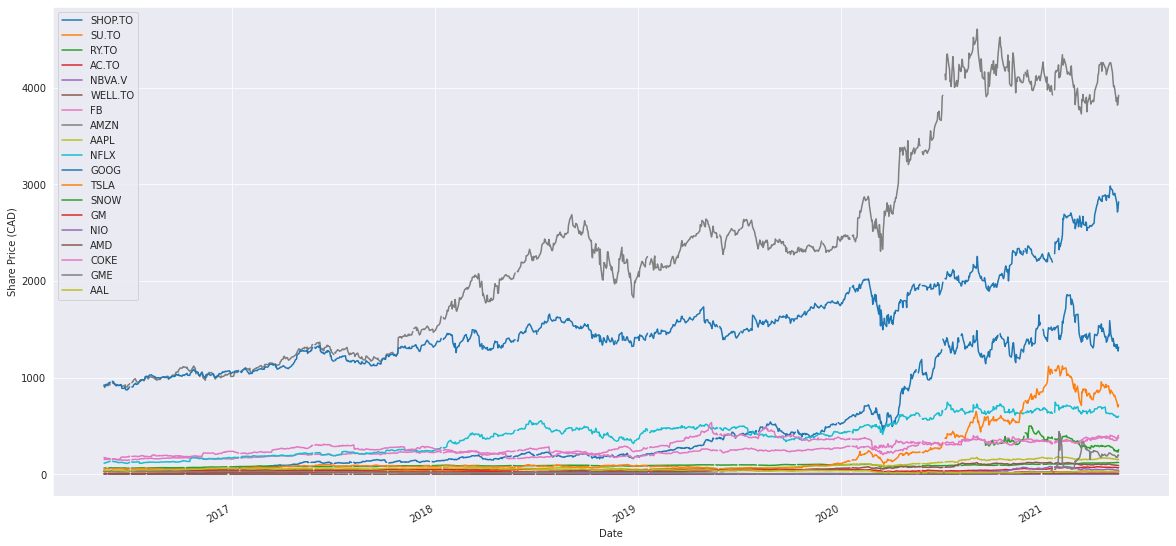

In [ ]:
# Plot data

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

tickers_data.plot(figsize=(20,10), xlabel = 'Date', ylabel = 'Share Price (CAD)')


In [ ]:
# Replace missing values (gaps in plot above) by linear interpolation

tickers_data = tickers_data.interpolate()

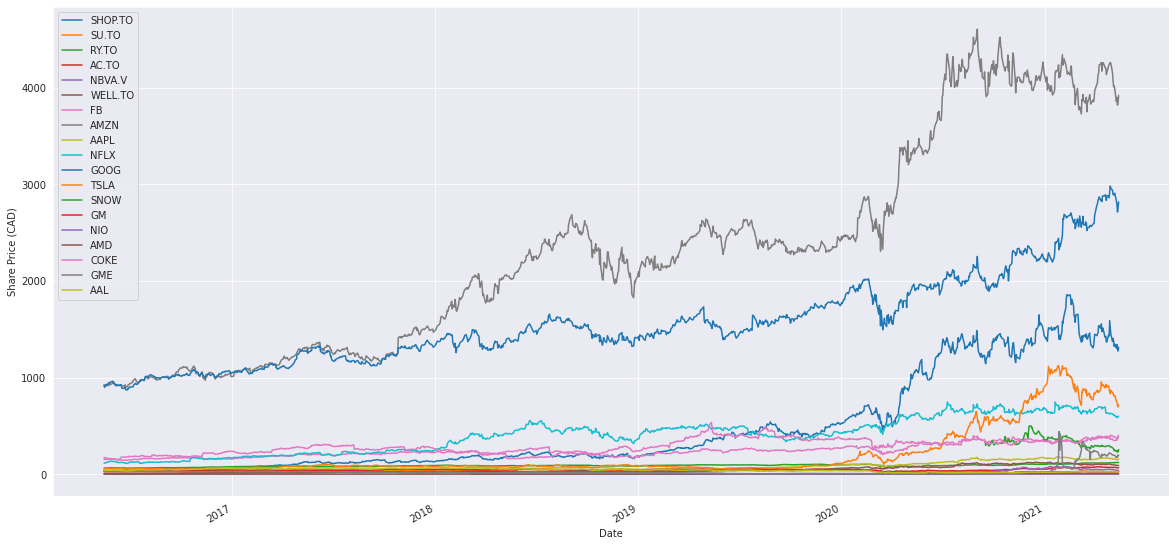

In [ ]:
tickers_data.plot(figsize=(20,10), xlabel = 'Date', ylabel = 'Share Price (CAD)')

### Calculate Daily Historical Returns

In [ ]:
returns = (tickers_data - tickers_data.shift(1))/tickers_data.shift(1)
returns

,SHOP.TO,SU.TO,RY.TO,AC.TO,NBVA.V,WELL.TO,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,GM,NIO,AMD,COKE,GME,AAL
Date,,,,,,,,,,,,,,,,,,,
2016-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-17,0.026105,0.004002,-0.002208,-0.005274,NaN,0.000000,-0.010648,-0.021186,-0.003676,-0.005020,-0.013846,-0.016956,NaN,-0.000824,NaN,0.000481,-0.038898,-0.018826,0.016678
2016-05-18,-0.006360,-0.020501,0.017179,-0.011665,NaN,-0.166667,0.011971,0.012556,0.020943,0.030688,0.009963,0.041499,NaN,0.013346,NaN,0.022707,0.015678,-0.005860,0.008463
2016-05-19,-0.010183,-0.002907,-0.007549,0.001073,NaN,0.280000,-0.002498,0.006216,0.000850,-0.005871,-0.004297,0.023896,NaN,-0.009374,NaN,-0.013639,-0.051444,0.023313,-0.009497
2016-05-20,0.006761,0.005831,0.003609,0.018221,NaN,-0.250000,0.006883,0.008391,0.013103,0.035155,0.015731,0.025862,NaN,0.010514,NaN,0.028835,0.018875,-0.000207,-0.002114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,-0.031278,-0.014655,0.000998,0.003210,-0.136000,0.035411,-0.043649,-0.033311,-0.028408,-0.036620,-0.026384,-0.066944,-0.061823,-0.029385,-0.073139,-0.038359,0.006122,-0.113418,-0.002672
2021-05-11,0.030393,-0.020184,-0.008058,-0.003600,0.018519,-0.010944,0.002129,0.010776,-0.007115,0.017542,-0.013756,-0.018530,0.039727,-0.028974,0.016032,0.011355,0.006356,0.026140,-0.019254
2021-05-12,-0.020404,0.020600,0.004438,-0.022481,-0.063636,-0.038728,-0.010879,-0.020238,-0.022859,-0.018311,-0.028112,-0.042209,-0.048008,-0.033291,-0.032066,-0.026432,0.064006,-0.012395,-0.035499


### Calculate Covariance Matrix


In [ ]:
covariance = returns.cov()*252
covariance

,SHOP.TO,SU.TO,RY.TO,AC.TO,NBVA.V,WELL.TO,FB,AMZN,AAPL,NFLX,GOOG,TSLA,SNOW,GM,NIO,AMD,COKE,GME,AAL
SHOP.TO,0.255166,0.017079,0.020735,0.035816,0.044076,0.057817,0.068523,0.073657,0.065716,0.082644,0.057883,0.094897,0.154162,0.034478,0.111926,0.112972,0.022240,-0.022222,0.032817
SU.TO,0.017079,0.144404,0.040500,0.085844,0.030739,0.031898,0.027773,0.014886,0.026970,0.015026,0.032829,0.040029,0.008280,0.057357,0.057083,0.031757,0.023371,0.034845,0.081675
RY.TO,0.020735,0.040500,0.036540,0.038461,0.022186,0.019703,0.024137,0.015541,0.025179,0.016262,0.023844,0.026876,0.002691,0.038235,0.041648,0.028936,0.022400,0.016895,0.048493
AC.TO,0.035816,0.085844,0.038461,0.227535,0.095362,0.023753,0.025816,0.013689,0.026628,0.015955,0.031837,0.052661,0.029066,0.083060,0.075860,0.046652,0.034561,0.046158,0.149362
NBVA.V,0.044076,0.030739,0.022186,0.095362,4.559362,0.058772,0.029049,0.030917,0.053023,0.013614,0.022240,0.065424,0.017707,0.037610,0.007575,-0.017344,0.019263,0.103221,0.013053
WELL.TO,0.057817,0.031898,0.019703,0.023753,0.058772,0.718394,0.018878,0.021260,0.022705,0.015463,0.011846,0.040066,0.086520,0.025056,0.086218,0.053122,0.021051,0.032343,0.033093
FB,0.068523,0.027773,0.024137,0.025816,0.029049,0.018878,0.104047,0.059140,0.059528,0.061270,0.059592,0.060675,0.072911,0.040040,0.080598,0.068939,0.025616,0.015511,0.029423
AMZN,0.073657,0.014886,0.015541,0.013689,0.030917,0.021260,0.059140,0.083075,0.054989,0.068761,0.051719,0.062493,0.077096,0.023471,0.077435,0.075109,0.018938,0.014985,0.022453
AAPL,0.065716,0.026970,0.025179,0.026628,0.053023,0.022705,0.059528,0.054989,0.090242,0.054876,0.052697,0.069564,0.074795,0.038180,0.092736,0.078666,0.029322,0.037484,0.039885
NFLX,0.082644,0.015026,0.016262,0.015955,0.013614,0.015463,0.061270,0.068761,0.054876,0.156531,0.054367,0.073767,0.073822,0.026253,0.080279,0.085994,0.012298,-0.000266,0.020133


### Estimate Expected Returns
Calculate expected returns based on Yahoo Finance beta values and the CAPM pricing model formula

In [ ]:
# Load beta information from Yahoo Finance
beta_list = []
tickers = covariance.columns
for ticker in tickers:
  stock = yf.Ticker(ticker)
  beta_list.append(stock.info['beta'])

beta_list

[1.441809,
 None,
 0.792079,
 2.481188,
 0.70038,
 1.260736,
 1.286265,
 1.123,
 1.219525,
 0.794815,
 0.995587,
 2.010479,
 None,
 1.387755,
 2.613181,
 2.055708,
 1.11252,
 -1.816878,
 1.931053]

In [ ]:
# Manually replacing beta values for SU.TO and SNOW since API call failed

beta_list[1] = 1.98
beta_list[12] = 1.31
beta_list

[1.441809,
 1.98,
 0.792079,
 2.481188,
 0.70038,
 1.260736,
 1.286265,
 1.123,
 1.219525,
 0.794815,
 0.995587,
 2.010479,
 1.31,
 1.387755,
 2.613181,
 2.055708,
 1.11252,
 -1.816878,
 1.931053]

In [ ]:
# Define constants
rate_rf = 0.018
index_return = 0.078

print('Expected returns for basket based on CAPM pricing model formula:\n')
for i in range(0,len(tickers)):
  expected_return = rate_rf + beta_list[i]*(index_return-rate_rf)*100
  print(f'{tickers[i]}: {expected_return:0.2f}%')


Expected returns for basket based on CAPM pricing model formula:

SHOP.TO: 8.67%
SU.TO: 11.90%
RY.TO: 4.77%
AC.TO: 14.91%
NBVA.V: 4.22%
WELL.TO: 7.58%
FB: 7.74%
AMZN: 6.76%
AAPL: 7.34%
NFLX: 4.79%
GOOG: 5.99%
TSLA: 12.08%
SNOW: 7.88%
GM: 8.34%
NIO: 15.70%
AMD: 12.35%
COKE: 6.69%
GME: -10.88%
AAL: 11.60%
